In [1]:
import tensorflow as tf
import os
import zipfile
import gdown

In [2]:
gdown.download(id='1NvV6VhmrfU8JDZNoEbwJxwx_6dhyN5bf')

Downloading...
From: https://drive.google.com/uc?id=1NvV6VhmrfU8JDZNoEbwJxwx_6dhyN5bf
To: C:\Users\i\PycharmProjects\pythonProject\happy-or-sad.zip
100%|██████████| 2.67M/2.67M [00:00<00:00, 4.29MB/s]


'happy-or-sad.zip'

In [3]:
zip_ref = zipfile.ZipFile("happy-or-sad.zip",'r')
zip_ref.extractall("./hs")
zip_ref.close()


In [4]:
train_happy = os.path.join('.\\hs\\happy')
train_sad = os.path.join('.\\hs\\sad')

In [5]:
train_happy = os.listdir(train_happy)
train_sad = os.listdir(train_sad)

print(train_happy[:10])
print(train_sad[:10])

['happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png', 'happy1-05.png', 'happy1-06.png', 'happy1-07.png', 'happy1-08.png', 'happy1-09.png']
['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png', 'sad1-05.png', 'sad1-06.png', 'sad1-07.png', 'sad1-08.png', 'sad1-09.png']


In [6]:
print("Happy len = ", len(train_happy))
print("Sad len = ", len(train_sad))

Happy len =  40
Sad len =  40


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '.\\hs',
    target_size=(300,300),
    batch_size=10,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [23]:
DESIRED_ACCURACY = 0.999

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy')>=DESIRED_ACCURACY:
            print("Achieved desired Accuracy")
            self.model.stop_training = True

callbacks = myCallBack()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), input_shape=(300,300,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

d:\users\i\pycharmprojects\pythonproject\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs=20,
    verbose=1,
    callbacks=[myCallBack()]
)

Epoch 1/20
5/5 [==============================] - 1s 156ms/step - loss: 26.0842 - accuracy: 0.4600
Epoch 2/20
5/5 [==============================] - 1s 158ms/step - loss: 0.8683 - accuracy: 0.5400
Epoch 3/20
5/5 [==============================] - 1s 159ms/step - loss: 0.4690 - accuracy: 0.9000

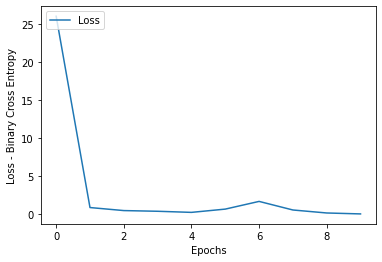

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
# plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss - Binary Cross Entropy')
plt.legend(loc='upper left')
plt.show()

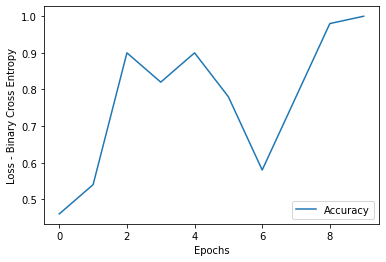

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss - Binary Cross Entropy')
plt.legend(loc='lower right')
plt.show()